# Unit 3: Base length of isosceles triangle 

Foundations of Science by C. Rummel, 2022-10-20 


In [1]:
# import required Python packages 

import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline


### measurements 

You can either use the measurements collected during the lecture (if available) or sample from a distribution. 
You need to run only one of the following three cells. 


In [ ]:
# Numpy arrays for measurements from lecture if available, all measurements in millimeters, e.g.

c_meas     = np.array([]) 
alpha_meas = np.array([]) 

a_meas     = np.array([])


In [2]:
# if we had no measurements from the lecture, we could sample Gaussian distributions 

N = 100

c_meas = np.random.normal(loc=65., scale=2., size=N)
alpha_meas = np.random.normal(loc=36., scale=2., size=N)
a_meas = np.random.normal(loc=40., scale=2., size=N)


In [ ]:
# if we had no measurements from the lecture, we could sample uniform distributions 

N = 100

c_meas = np.random.uniform(low=63., high=67., size=N)
alpha_meas = np.random.uniform(low=34., high=38., size=N)
a_meas = np.random.uniform(low=38., high=42., size=N)


In [3]:
c_meas

array([66.50390836, 61.53283319, 61.66226781, 63.83551   , 67.33916554,
       66.07784261, 61.56090875, 65.44953287, 62.84894772, 64.01816685,
       66.11908533, 63.96244056, 63.51820839, 67.42007361, 62.38733524,
       60.91137554, 65.0828537 , 64.40384379, 61.94603179, 63.38753313,
       67.163889  , 60.17343202, 66.65161815, 63.73066922, 64.2297442 ,
       64.3198254 , 65.93694296, 66.90365712, 66.16955876, 64.40005151,
       61.44442882, 61.19456564, 62.80224957, 62.7662326 , 62.24095714,
       66.8207708 , 63.88647975, 68.64727954, 66.60505062, 66.93894738,
       68.07331053, 63.90287719, 60.73438733, 67.20434883, 66.59941124,
       63.08100223, 66.18803772, 61.28229839, 65.8995062 , 64.105929  ,
       62.41691387, 61.6581473 , 66.05842814, 59.46390292, 64.53678785,
       62.27281539, 61.87013644, 70.56581236, 66.12436893, 66.37196559,
       65.74342   , 65.27548869, 66.2761074 , 64.52040657, 68.1344492 ,
       66.26789258, 67.58532955, 63.66080797, 63.38659999, 65.22

### distribution of measurements


measured c     = 64.545 +- 2.258
measured alpha = 36.043 +- 2.180


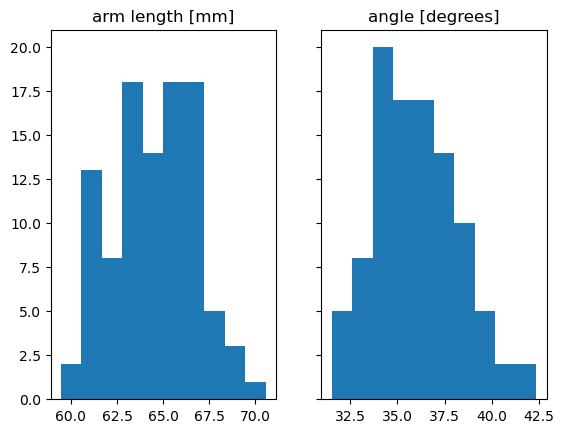

In [4]:
# first we display the distribution of our measurements for c and alpha 
# and calculate their mean and standard deviation 

numb_bins = 10
#numb_bins = int(np.sqrt(N))

fig, ax = plt.subplots(1, 2, sharey=True)
_ = ax[0].hist(c_meas, bins=numb_bins)
ax[0].set_title('arm length [mm]')
_ = ax[1].hist(alpha_meas, bins=numb_bins)
ax[1].set_title('angle [degrees]')

c_meas_mean = c_meas.mean() 
c_meas_std = c_meas.std()

alpha_meas_mean = alpha_meas.mean()
alpha_meas_std = alpha_meas.std()

print('measured c     = {0:.3f} +- {1:.3f}'.format(c_meas_mean, c_meas_std)) 
print('measured alpha = {0:.3f} +- {1:.3f}'.format(alpha_meas_mean, alpha_meas_std)) 


### uncertainty propagation


In [5]:
# then we calculate the distribution of base lengths a for all measurements 
# and estimate the first two moments

def deg2rad(deg):
    '''
    convert angle from degrees to radians
    '''
    return deg / 180.0 * np.pi

a_calc = 2 * c_meas * np.sin(deg2rad(alpha_meas) / 2)

a_calc_mean = a_calc.mean()
a_calc_std = a_calc.std()

print('calculated a = {0:.3f} +- {1:.3f}'.format(a_calc_mean, a_calc_std))


calculated a = 39.935 +- 2.789


measured a = 40.160 +- 1.955


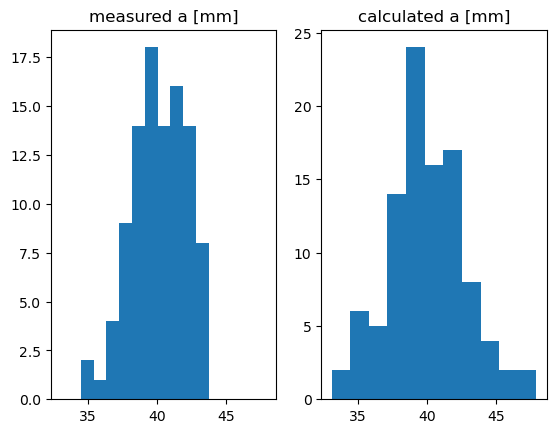

In [6]:
# for comparison: display the distribution of measured and calculated base length a 

fig, ax = plt.subplots(1, 2, sharex=True)
_ = ax[0].hist(a_meas, bins=numb_bins)
ax[0].set_title('measured a [mm]')
_ = ax[1].hist(a_calc, bins='auto')
ax[1].set_title('calculated a [mm]')

a_meas_mean = a_meas.mean() 
a_meas_std = a_meas.std()

print('measured a = {0:.3f} +- {1:.3f}'.format(a_meas_mean, a_meas_std)) 


difference = -0.225 +- 3.374


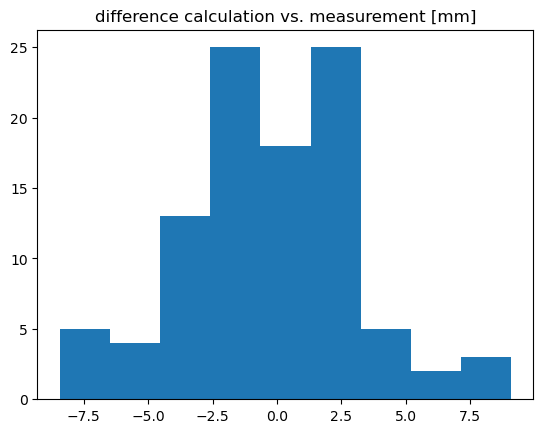

In [7]:
# compare calculated with measured base lengths

diff = a_calc - a_meas

fig, ax = plt.subplots(1, 1)
_ = plt.hist(diff, bins='auto')
ax.set_title('difference calculation vs. measurement [mm]')

diff_mean = diff.mean()
diff_std = diff.std()

print('difference = {0:.3f} +- {1:.3f}'.format(diff_mean, diff_std))


In [8]:
# estimate expectation and error from quadratic error propagation

a_meas_var = (2 * np.sin(deg2rad(alpha_meas.mean()) / 2)) ** 2 * c_meas_std ** 2 
a_meas_var += (c_meas_mean * np.cos(deg2rad(alpha_meas.mean())) * np.pi / 180) ** 2 * alpha_meas_std ** 2
a_meas_std = np.sqrt(a_meas_var)

a_meas_std


2.4283567131273016

There is a remarkable match between the standard deviation of the distribution of base lengths a and our estimate of the uncertainty. Where do deviations come from? 
